<a href="https://colab.research.google.com/github/theresaltrinh/project_voting/blob/main/Visuals%3A%20Density%20Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/theresaltrinh/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 76 (delta 7), reused 6 (delta 3), pack-reused 62
Receiving objects: 100% (76/76), 31.43 MiB | 6.70 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Updating files: 100% (43/43), done.


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [8]:
df = pd.read_csv('/content/cleaned_voting_VA.csv')
df.head()

,Unnamed: 0,year,countyName,countyCode,candidate,party,candidatevotes,totalvotes
0,0,2000,Accomack,51001,Al Gore,Democrat,5092,11925
1,1,2000,Accomack,51001,George W. Bush,Republican,6352,11925
2,2,2000,Accomack,51001,Ralph Nader,Green,220,11925
3,3,2000,Accomack,51001,Other,Other,261,11925
4,4,2000,Albemarle,51003,Al Gore,Democrat,16255,36846


<Axes: xlabel='totalvotes', ylabel='Density'>

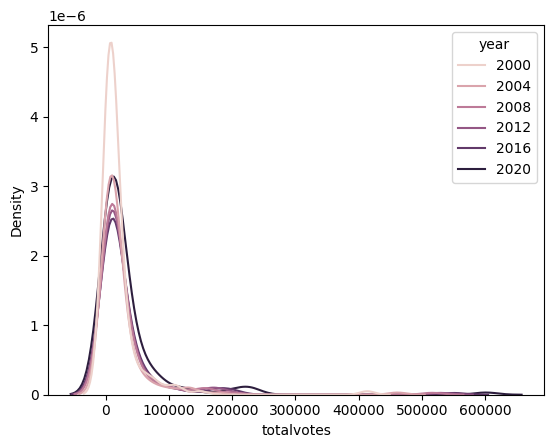

In [16]:
sns.kdeplot(data = df, x = 'totalvotes', hue = 'year')

<Axes: xlabel='candidatevotes', ylabel='Density'>

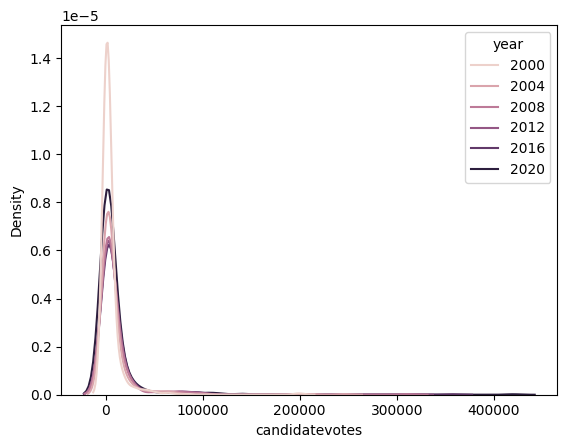

In [17]:
sns.kdeplot(data = df, x = 'candidatevotes', hue = 'year')

In [25]:
#adjacencies
cdf = pd.read_csv('/content/cleaned_county_adjacencies.csv')
cdf.head()
#cdf.describe()

,Unnamed: 0,County,Population,CountyCode,District,Neighborhood1,Neighborhood2,Neighborhood3,Neighborhood4,Neighborhood5,Neighborhood6,Neighborhood7,Neighborhood8,Neighborhood9,Neighborhood10,Neighborhood11,Neighborhood12
0,0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Population', ylabel='Density'>

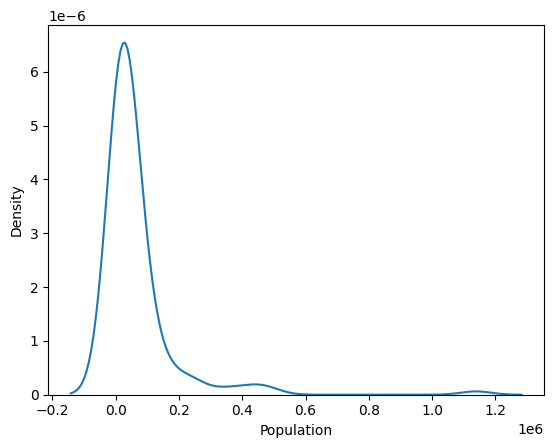

In [26]:
sns.kdeplot(data=cdf, x = 'Population' )

In [ ]:
gdf = gpd.read_file('/content/VirginiaCounty_ClippedToShoreline.shx')


# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf